<a href="https://colab.research.google.com/github/prog815/lernDLpython/blob/master/%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D1%81%D1%85%D0%BE%D0%B4%D0%B0_%D1%82%D0%BE%D0%BF%D0%BB%D0%B8%D0%B2%D0%B0_(%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# предсказание расхода топлива (регрессия)

Енин А.В.

Оренбург

19.08.2019

[VK](https://vk.com/alekseyenin)
[OK](http://ok.ru/profile/404477133)
[Twitter](https://twitter.com/EninAleksey)
[FB](https://www.facebook.com/alex.prog.1)
[Telegramm](https://t.me/AleseyEnin)
[Habr](https://habr.com/ru/users/eavprog/posts/)
[VC](https://vc.ru/u/262921-aleksey-enin)
[GitHub](https://github.com/prog815/lernDLpython)

Образец

https://www.tensorflow.org/tutorials/keras/basic_regression

# Подключем библиотеки

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Иппортируем данные

Датасет Auto MPG

Датасет доступен в репозитарии машинного обучения UCI.

## подкачиваем набор

In [104]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data -O auto-mpg.data

--2019-08-20 12:21:05--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data’

auto-mpg.data       100%[===================>]  29.58K  --.-KB/s    in 0.1s    

2019-08-20 12:21:05 (228 KB/s) - ‘auto-mpg.data’ saved [30286/30286]



In [105]:
!ls -l

total 36
-rw-r--r-- 1 root root 30286 Jul  8  1993 auto-mpg.data
drwxr-xr-x 1 root root  4096 Aug  2 16:06 sample_data


In [106]:
!head auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


In [0]:
column_names = ['Расход топлива','Кол-во цилиндров','Объем двигателя','Л.с.','Вес',
                'Разгон до 100 км/ч', 'Год выпуска', 'Страна выпуска','Марка']

## загружаем набор в тетрадку

In [108]:
row_dataset = pd.read_csv('auto-mpg.data',sep=' ',names=column_names,na_values='?',comment='\t',skipinitialspace=True)
row_dataset.tail()

,Расход топлива,Кол-во цилиндров,Объем двигателя,Л.с.,Вес,Разгон до 100 км/ч,Год выпуска,Страна выпуска,Марка
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,NaN
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,NaN
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,NaN
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,NaN
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,NaN


In [0]:
dataset = row_dataset.copy()

## откидываем плохие

In [110]:
dataset.isna().sum()

Расход топлива          0
Кол-во цилиндров        0
Объем двигателя         0
Л.с.                    6
Вес                     0
Разгон до 100 км/ч      0
Год выпуска             0
Страна выпуска          0
Марка                 398
dtype: int64

In [0]:
dataset = dataset.drop(columns=['Марка'],axis=1) ;

In [112]:
dataset.isna().sum()

Расход топлива        0
Кол-во цилиндров      0
Объем двигателя       0
Л.с.                  6
Вес                   0
Разгон до 100 км/ч    0
Год выпуска           0
Страна выпуска        0
dtype: int64

In [113]:
dataset = dataset.dropna() ;
dataset.shape

(392, 8)

In [114]:
dataset.isna().sum()

Расход топлива        0
Кол-во цилиндров      0
Объем двигателя       0
Л.с.                  0
Вес                   0
Разгон до 100 км/ч    0
Год выпуска           0
Страна выпуска        0
dtype: int64

## столбцы трех стран

In [0]:
orig = dataset.pop('Страна выпуска')

In [116]:
dataset['Америка'] = (orig == 1)*1.0
dataset['Европа'] = (orig == 2)*1.0
dataset['Япония'] = (orig == 3)*1.0
dataset.tail()

,Расход топлива,Кол-во цилиндров,Объем двигателя,Л.с.,Вес,Разгон до 100 км/ч,Год выпуска,Америка,Европа,Япония
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


# Выделение тестовой выборки

In [117]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
train_dataset.shape

(314, 10)

In [118]:
test_dataset = dataset.drop(train_dataset.index)
test_dataset.shape

(78, 10)

# Анализ данных тренировочной выборки

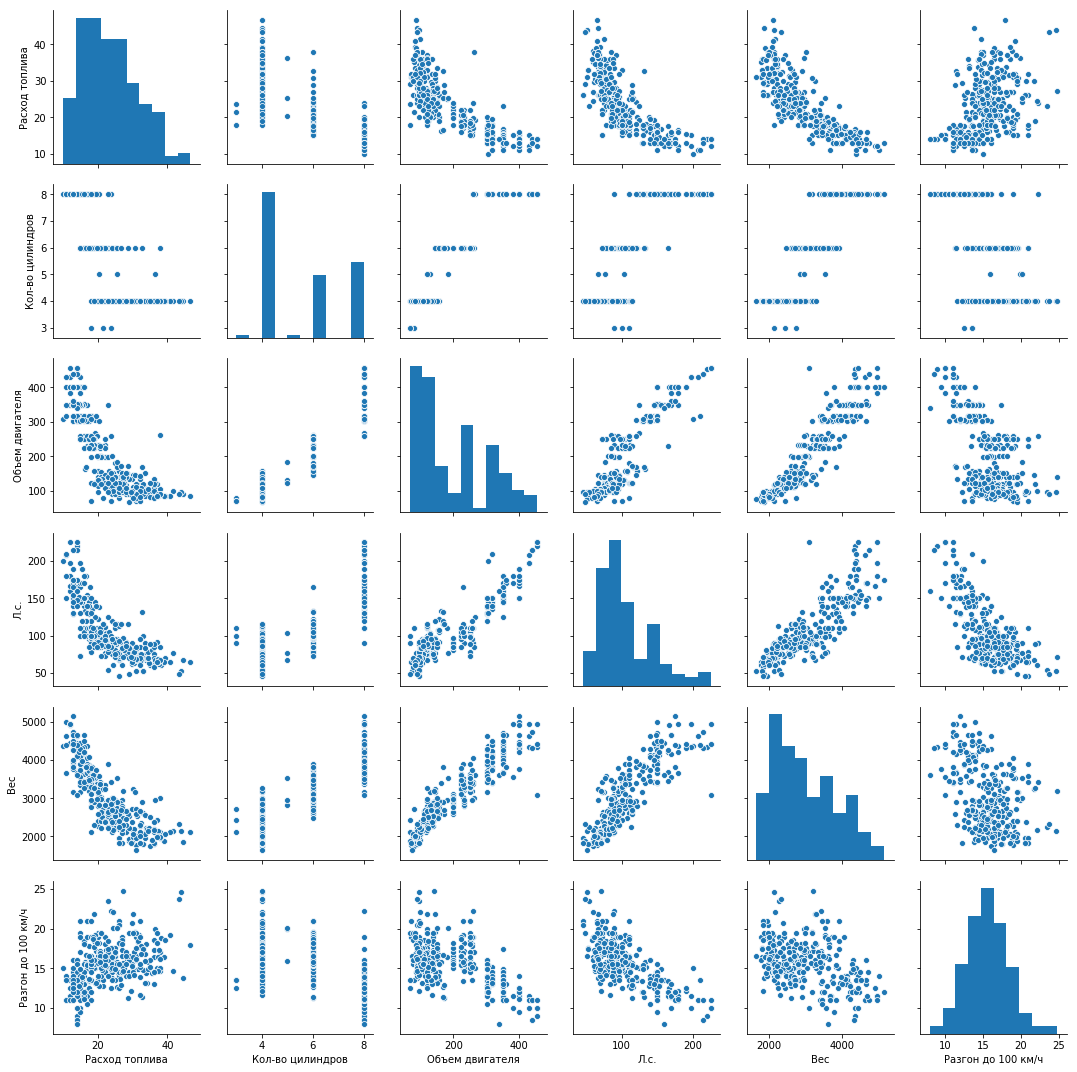

In [119]:
sns.pairplot( train_dataset[train_dataset.columns[:6]])

In [120]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Расход топлива,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Кол-во цилиндров,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Объем двигателя,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Л.с.,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Вес,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Разгон до 100 км/ч,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Год выпуска,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Америка,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Европа,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Япония,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


# Выделение маркеров

In [0]:
train_labels = train_dataset.pop('Расход топлива')
test_labels = test_dataset.pop('Расход топлива')

In [122]:
train_labels.describe()

count    314.000000
mean      23.310510
std        7.728652
min       10.000000
25%       17.000000
50%       22.000000
75%       28.950000
max       46.600000
Name: Расход топлива, dtype: float64

# Нормализация входных данных

In [0]:
mean_dataset = train_dataset.mean()
std_dataset = train_dataset.std()

In [0]:
norm_train_dataset = (train_dataset - mean_dataset) / std_dataset
norm_test_dataset = (test_dataset - mean_dataset) / std_dataset

In [125]:
norm_train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Кол-во цилиндров,314.0,2.093159e-16,1.0,-1.457657,-0.869348,-0.869348,1.483887,1.483887
Объем двигателя,314.0,1.018294e-16,1.0,-1.220325,-0.860894,-0.424785,0.675074,2.489002
Л.с.,314.0,-1.909301e-17,1.0,-1.545283,-0.751241,-0.272190,0.607162,3.153347
Вес,314.0,-9.723291e-17,1.0,-1.589352,-0.869478,-0.198782,0.732017,2.547401
Разгон до 100 км/ч,314.0,2.688832e-15,1.0,-2.710152,-0.630725,-0.021237,0.588250,3.313017
Год выпуска,314.0,9.561531e-16,1.0,-1.604642,-0.788458,0.027726,0.843910,1.660094
Америка,314.0,6.081476e-17,1.0,-1.286751,-1.286751,0.774676,0.774676,0.774676
Европа,314.0,8.485781e-18,1.0,-0.465148,-0.465148,-0.465148,-0.465148,2.143005
Япония,314.0,3.164489e-17,1.0,-0.495225,-0.495225,-0.495225,-0.495225,2.012852


# Первая безостановочная модель

## Построение модели

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation=tf.nn.relu,input_shape=[len(train_dataset.keys())]), 
        layers.Dense(64,activation=tf.nn.relu),
        layers.Dense(1)
    ])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss=tf.losses.mean_squared_error,optimizer=optimizer,metrics=['mae','mse'])
    return model

In [127]:
model = build_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## Обучение

In [128]:
EPOCHS = 1000
history = model.fit(norm_train_dataset,train_labels,epochs=EPOCHS,validation_split=0.2,verbose=2)

Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 - 0s - loss: 574.5028 - mean_absolute_error: 22.6612 - mean_squared_error: 574.5029 - val_loss: 577.0286 - val_mean_absolute_error: 22.6591 - val_mean_squared_error: 577.0286
Epoch 2/1000
251/251 - 0s - loss: 541.4100 - mean_absolute_error: 21.8875 - mean_squared_error: 541.4100 - val_loss: 538.6155 - val_mean_absolute_error: 21.7531 - val_mean_squared_error: 538.6156
Epoch 3/1000
251/251 - 0s - loss: 504.3551 - mean_absolute_error: 20.9843 - mean_squared_error: 504.3551 - val_loss: 494.6181 - val_mean_absolute_error: 20.6739 - val_mean_squared_error: 494.6181
Epoch 4/1000
251/251 - 0s - loss: 461.8079 - mean_absolute_error: 19.9223 - mean_squared_error: 461.8079 - val_loss: 444.1625 - val_mean_absolute_error: 19.3811 - val_mean_squared_error: 444.1624
Epoch 5/1000
251/251 - 0s - loss: 413.6077 - mean_absolute_error: 18.6542 - mean_squared_error: 413.6077 - val_loss: 388.4047 - val_mean_absolute_error: 17.8626 - val_mean

## Графики истории обучения

In [129]:
hist = pd.DataFrame( history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.873656,1.108565,2.873656,10.058911,2.366030,10.058910,995
996,2.492960,0.989652,2.492960,10.639190,2.400733,10.639190,996
997,2.627547,1.013986,2.627547,10.458848,2.414903,10.458849,997
998,2.822452,1.088575,2.822452,9.950804,2.344254,9.950804,998
999,2.491406,1.016381,2.491406,10.157034,2.367118,10.157034,999


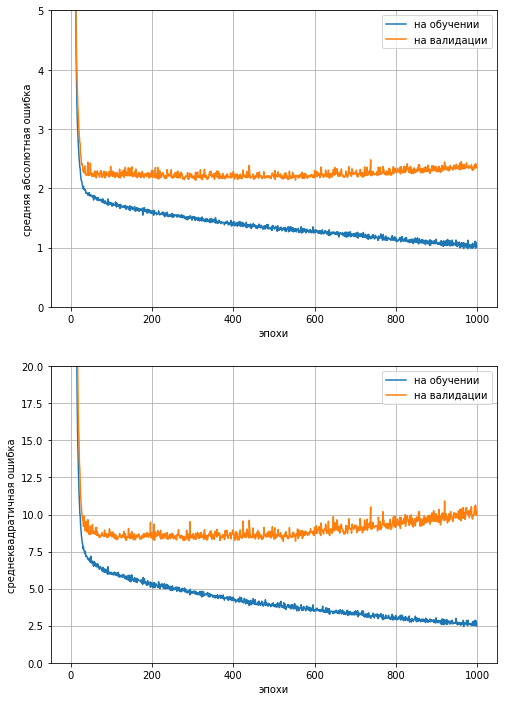

In [132]:
def plot_hist(history):
  hist = pd.DataFrame( history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.plot(hist['epoch'],hist['mean_absolute_error'],label='на обучении')
  plt.plot(hist['epoch'],hist['val_mean_absolute_error'],label='на валидации')
  plt.legend()
  plt.xlabel('эпохи')
  plt.ylabel('средняя абсолютная ошибка')
  plt.ylim(0,5)
  plt.grid()

  plt.subplot(2,1,2)
  plt.plot(hist['epoch'],hist['mean_squared_error'],label='на обучении')
  plt.plot(hist['epoch'],hist['val_mean_squared_error'],label='на валидации')
  plt.legend()
  plt.xlabel('эпохи')
  plt.ylabel('среднеквадратичная ошибка')
  plt.ylim(0,20)
  plt.grid()

  plt.show()

plot_hist(history)

## смотрим на тесте

In [133]:
model.evaluate(norm_test_dataset,test_labels)

78/78 [==============================] - 0s 105us/sample - loss: 7.6434 - mean_absolute_error: 2.1627 - mean_squared_error: 7.6434


[7.643387745588254, 2.1627438, 7.643388]

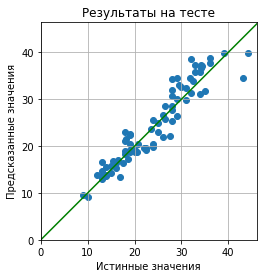

In [134]:
def test_plot():
  test_pred = model.predict(norm_test_dataset)

  plt.scatter(test_labels,test_pred)
  plt.xlabel('Истинные значения')
  plt.ylabel('Предсказанные значения')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim(0,plt.xlim()[1])
  plt.ylim(0,plt.ylim()[1])
  plt.plot([-100,100],[-100,100],'g')
  plt.grid()
  plt.title('Результаты на тесте')
  plt.show()

test_plot()  

# Вторая остановочная модель

## Построение модели

In [135]:
model = build_model()

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## обучение модели

In [136]:
early_stop = keras.callbacks.EarlyStopping('val_loss',patience=50)

history = model.fit(norm_train_dataset,train_labels,epochs=EPOCHS,validation_split=0.2,verbose=2,callbacks=[early_stop])

Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 - 0s - loss: 579.4960 - mean_absolute_error: 22.7264 - mean_squared_error: 579.4960 - val_loss: 583.3553 - val_mean_absolute_error: 22.7468 - val_mean_squared_error: 583.3553
Epoch 2/1000
251/251 - 0s - loss: 545.1435 - mean_absolute_error: 21.9459 - mean_squared_error: 545.1436 - val_loss: 545.4998 - val_mean_absolute_error: 21.8825 - val_mean_squared_error: 545.4998
Epoch 3/1000
251/251 - 0s - loss: 507.5016 - mean_absolute_error: 21.0636 - mean_squared_error: 507.5016 - val_loss: 501.4840 - val_mean_absolute_error: 20.8365 - val_mean_squared_error: 501.4840
Epoch 4/1000
251/251 - 0s - loss: 464.1468 - mean_absolute_error: 19.9916 - mean_squared_error: 464.1468 - val_loss: 451.4389 - val_mean_absolute_error: 19.5871 - val_mean_squared_error: 451.4389
Epoch 5/1000
251/251 - 0s - loss: 414.6260 - mean_absolute_error: 18.7186 - mean_squared_error: 414.6259 - val_loss: 394.9590 - val_mean_absolute_error: 18.1085 - val_mean

## графики истории обучения

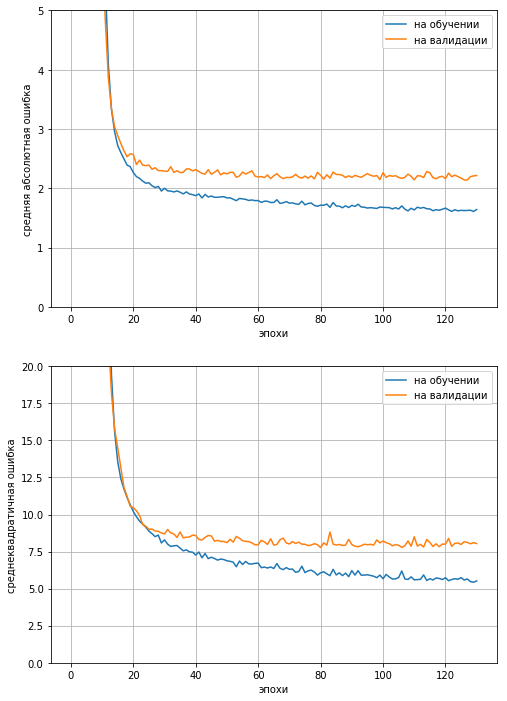

In [137]:
plot_hist(history)

## тестирование модели

In [139]:
model.evaluate(norm_test_dataset,test_labels)

78/78 [==============================] - 0s 144us/sample - loss: 5.3764 - mean_absolute_error: 1.7813 - mean_squared_error: 5.3764


[5.376385713234926, 1.7812607, 5.3763857]

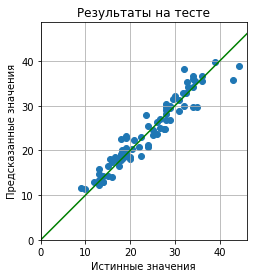

In [138]:
test_plot()